In [ ]:
import sys
'geopandas' in sys.modules

In [ ]:
!pip3 install geopandas

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
from geopy.distance import geodesic
from shapely.geometry import Point, LineString, shape
import matplotlib.pyplot as plt

In [2]:
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp)
map_df = map_df.loc[map_df['st_nm'] == 'Karnataka']
print(map_df)

id      st_nm                                           geometry
13  None  Karnataka  POLYGON ((77.55301 18.29376, 77.65650 17.97231...


In [3]:
data_df = pd.read_csv('../data/lab_data_v0.csv')
data_df.head()

,id,lat,lon,district_id,lab_type,capacity,backlogs
0,1,12.937422,77.590847,5,0,800,0
1,2,12.963785,77.573826,5,0,600,0
2,3,12.964891,77.628136,5,0,200,0
3,4,12.315086,76.650351,22,0,300,0
4,5,13.005136,76.102740,15,0,500,0


In [4]:
data_df.drop(data_df.columns.difference(['lat', 'lon', 'id', 'district_id']), 1, inplace=True)
data_df.head()

,id,lat,lon,district_id
0,1,12.937422,77.590847,5
1,2,12.963785,77.573826,5
2,3,12.964891,77.628136,5
3,4,12.315086,76.650351,22
4,5,13.005136,76.102740,15


In [5]:
gdf = gpd.GeoDataFrame(data_df, geometry=gpd.points_from_xy(data_df.lon, data_df.lat))
gdf.head()

,id,lat,lon,district_id,geometry
0,1,12.937422,77.590847,5,POINT (77.59085 12.93742)
1,2,12.963785,77.573826,5,POINT (77.57383 12.96379)
2,3,12.964891,77.628136,5,POINT (77.62814 12.96489)
3,4,12.315086,76.650351,22,POINT (76.65035 12.31509)
4,5,13.005136,76.102740,15,POINT (76.10274 13.00514)


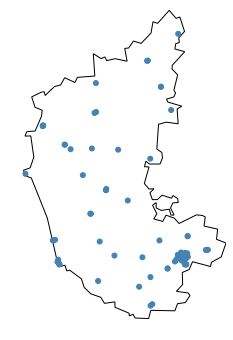

In [6]:
ax = gplt.polyplot(map_df)
gplt.pointplot(gdf, ax=ax)

In [7]:
gdf.head()

,id,lat,lon,district_id,geometry
0,1,12.937422,77.590847,5,POINT (77.59085 12.93742)
1,2,12.963785,77.573826,5,POINT (77.57383 12.96379)
2,3,12.964891,77.628136,5,POINT (77.62814 12.96489)
3,4,12.315086,76.650351,22,POINT (76.65035 12.31509)
4,5,13.005136,76.102740,15,POINT (76.10274 13.00514)


In [8]:
district_df = gpd.read_file('c44c9b96-f570-4ee3-97f1-ebad64efa4c2202044-1-1rb4x6s.8xx6.shp')
district_df.head()

,objectid,statecode,statename,state_ut,distcode,distname,st_area(sh,st_length(,countrynam,geometry
0,1,27,MAHARASHTRA,STATE,499,Jalgaon,1.353967e+10,8.464308e+05,India,"POLYGON ((75.23335 21.41481, 75.23469 21.41453..."
1,2,27,MAHARASHTRA,STATE,516,Nashik,1.771358e+10,9.720056e+05,India,"POLYGON ((74.13013 20.86311, 74.13215 20.86160..."
2,3,27,MAHARASHTRA,STATE,509,Chandrapur,1.294532e+10,7.410244e+05,India,"POLYGON ((79.75755 20.73462, 79.76047 20.73463..."
3,4,27,MAHARASHTRA,STATE,510,Yavatmal,1.547940e+10,1.014942e+06,India,"POLYGON ((78.26132 20.69735, 78.26276 20.69717..."
4,5,27,MAHARASHTRA,STATE,511,Nanded,1.186387e+10,1.131732e+06,India,"POLYGON ((78.05387 19.92452, 78.05449 19.92435..."


In [10]:
district_df = district_df.loc[district_df['statename' ] == 'KARNATAKA']
district_df.head()

,objectid,statecode,statename,state_ut,distcode,distname,st_area(sh,st_length(,countrynam,geometry
8,9,29,KARNATAKA,STATE,558,Bidar,6.048725e+09,576381.444195,India,"POLYGON ((77.32647 18.45884, 77.32648 18.45803..."
9,10,29,KARNATAKA,STATE,579,Kalaburagi,1.207770e+10,940252.819951,India,"POLYGON ((76.61447 17.77067, 76.61539 17.77040..."
12,13,29,KARNATAKA,STATE,580,Yadgir,5.776520e+09,575750.286065,India,"POLYGON ((77.06501 16.95400, 77.06638 16.95361..."
13,14,29,KARNATAKA,STATE,556,Bagalkote,7.147971e+09,696275.672796,India,"POLYGON ((75.42069 16.76789, 75.42123 16.76770..."
18,19,29,KARNATAKA,STATE,561,Gadag,5.041393e+09,587894.361242,India,"POLYGON ((75.45154 15.88647, 75.45298 15.88632..."


In [11]:
gdf_hq = pd.read_csv('../data/districts_data_v0.csv')
gdf_hq = gpd.GeoDataFrame(gdf_hq, geometry=gpd.points_from_xy(gdf_hq.lon, gdf_hq.lat))
gdf_hq.head()

,district_id,district_name,lat,lon,samples,geometry
0,1,BAGALKOT,16.161286,75.662100,350,POINT (75.66210 16.16129)
1,2,BELAGAVI,15.855109,74.507850,400,POINT (74.50785 15.85511)
2,3,BELLARY,15.145152,76.926819,500,POINT (76.92682 15.14515)
3,4,BENGALURU RURAL,13.296994,77.800183,600,POINT (77.80018 13.29699)
4,5,BENGALURU URBAN,12.967012,77.587431,7000,POINT (77.58743 12.96701)


In [21]:
fz = open('transactions.out')

In [22]:
data = []
x2 = gpd.GeoDataFrame({'geometry': []})
for line in fz:
    a, b, c, d = [int(x) for x in line.split()]
    if d == 0:
        continue
    print(a, b, c, d)
    if a == 0:
        for _, row in gdf_hq.iterrows():
            if row['district_id'] != b:
                continue
            for _, row2 in gdf.iterrows():
                if row2['id'] != c:
                    continue
                # if c == 53:
                if row2['district_id'] == row['district_id']:
                    break
                x2.loc[len(x2)] = [LineString( [(row['geometry']), (row2['geometry'])] )]
                break
            break
x2.head()

0 1 43 36
0 1 20 100
0 1 76 36
0 1 13 100
0 1 11 78
0 2 13 100
0 2 11 100
0 2 46 100
0 2 45 100
0 3 53 100
0 3 59 36
0 3 64 100
0 3 30 100
0 3 78 100
0 3 38 64
0 4 51 36
0 4 52 100
0 4 83 100
0 4 29 100
0 4 12 100
0 4 49 36
0 4 82 100
0 4 23 28
0 5 62 36
0 5 63 100
0 5 52 100
0 5 67 100
0 5 66 36
0 5 79 100
0 5 41 100
0 5 17 100
0 5 84 100
0 5 4 100
0 5 61 36
0 5 18 100
0 5 5 100
0 5 54 36
0 5 69 100
0 5 19 100
0 5 6 100
0 5 38 100
0 5 78 100
0 5 9 100
0 5 37 100
0 5 28 100
0 5 34 100
0 5 86 100
0 5 36 72
0 5 10 100
0 5 53 100
0 5 33 100
0 5 80 100
0 5 58 100
0 5 57 36
0 5 64 100
0 5 11 100
0 5 13 100
0 5 45 100
0 5 44 36
0 5 55 36
0 5 56 100
0 5 46 100
0 5 42 100
0 5 14 100
0 5 81 30
0 5 48 36
0 5 71 100
0 5 7 100
0 5 65 100
0 6 7 100
0 6 56 100
0 6 9 100
0 6 53 100
0 6 13 100
0 6 14 100
0 7 4 100
0 7 17 50
0 8 29 100
0 8 83 100
0 8 12 100
0 8 16 50
0 9 5 100
0 9 19 100
0 10 78 100
0 10 6 100
0 10 9 100
0 10 41 50
0 11 58 100
0 11 33 100
0 11 69 100
0 11 5 100
0 11 84 100
0 11 4 100
0

,geometry
0,"LINESTRING (75.66210 16.16129, 75.69148 16.82823)"
1,"LINESTRING (75.66210 16.16129, 75.60218 15.37861)"
2,"LINESTRING (75.66210 16.16129, 75.00599 15.46146)"
3,"LINESTRING (75.66210 16.16129, 74.99819 15.46511)"
4,"LINESTRING (75.66210 16.16129, 75.13075 15.36189)"


82


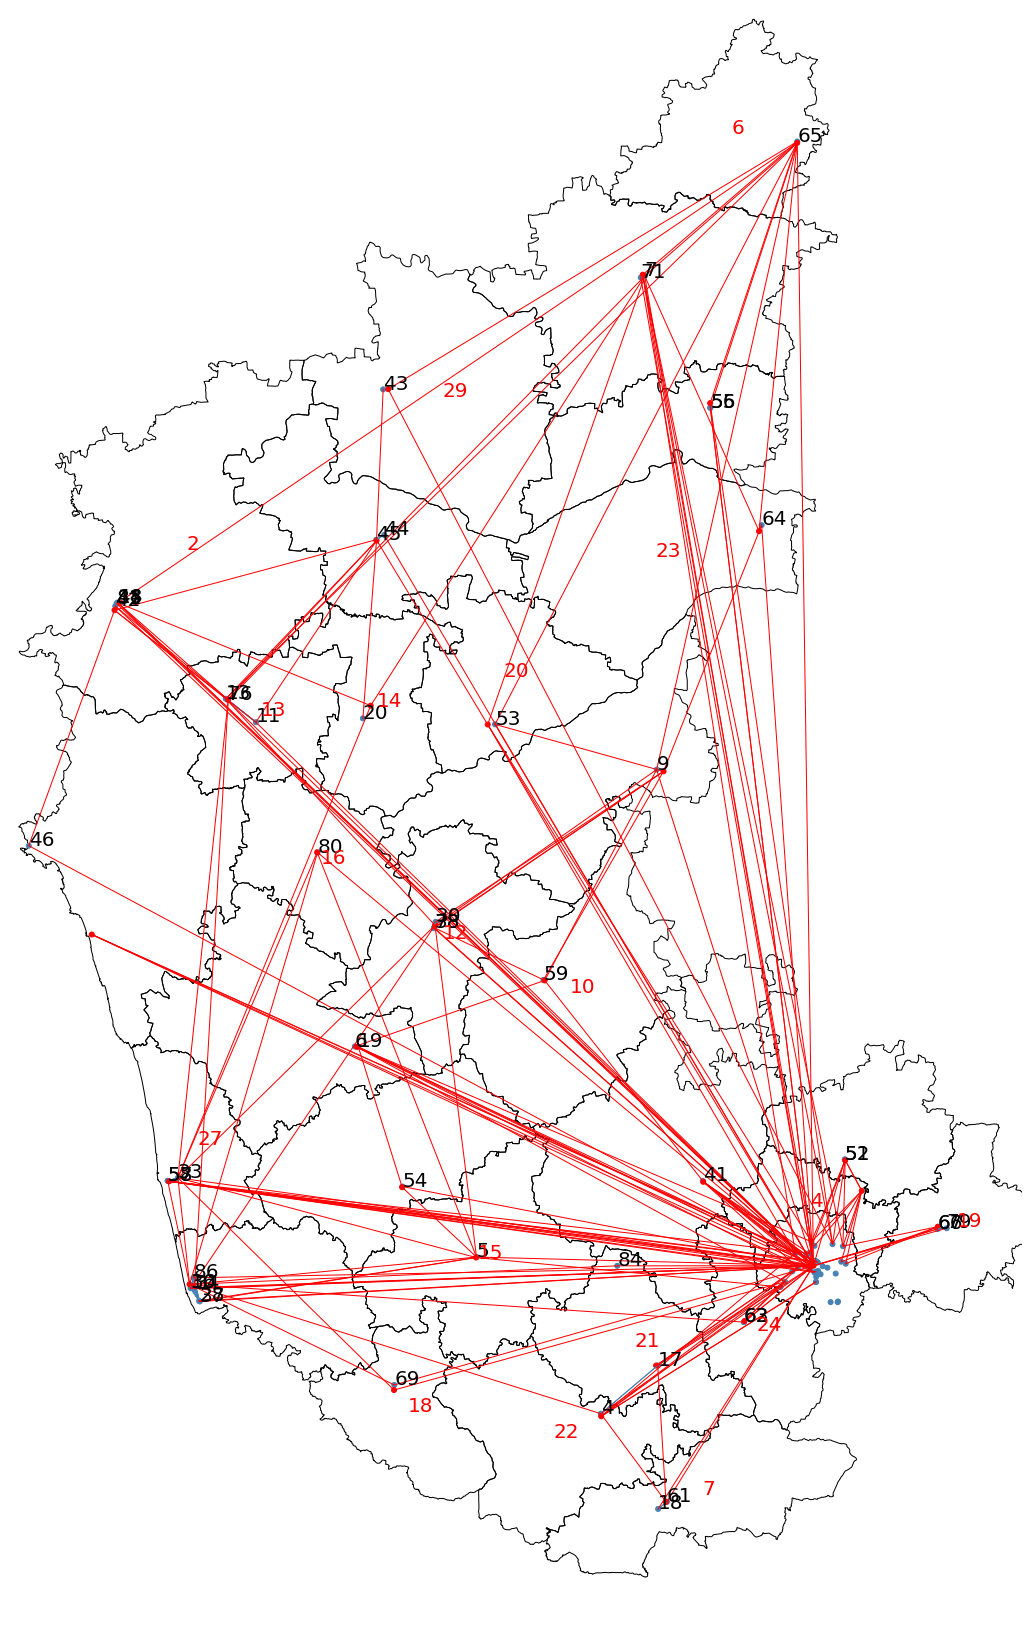

In [23]:
cnt = 0
x = gpd.GeoDataFrame({'geometry': []})
for idx1, row1 in gdf.iterrows():
    for idx2, row2 in gdf.iterrows():
        if idx1 == idx2:
            continue
        if row1['district_id'] == 5 or row2['district_id'] == 5:
            continue
        dist = geodesic((row2['lat'],row2['lon']), (row1['lat'],row1['lon'])).km
        if dist <= 40:
            line = LineString( ([Point(row1['lon'], row1['lat']), Point(row2['lon'], row2['lat'])]) )
            x.loc[len(x)] = [line]
            cnt += 1
print(cnt)
x.head()
ax3 = gplt.sankey(x, figsize=(30, 30))
gplt.sankey(x2, ax=ax3, color=[1, 0, 0, 1])
gplt.polyplot(district_df, ax=ax3)
gplt.pointplot(gdf, ax=ax3)
c = [1, 0, 0]
gplt.pointplot(gdf_hq, ax=ax3, color=c)
plt.rc('font', size=20)
for idx, row in gdf.iterrows():
    if row['district_id'] != 5:
        plt.text(s=row['id'], x=row['lon'], y=row['lat'])
for idx, row in district_df.iterrows():
    pt = row['geometry'].centroid
    lmao = pd.read_csv('../data/districts_data_v0.csv')
    for idx, row2 in lmao.iterrows():
        if row2['district_name'].lower() == row['distname'].lower():
            plt.text(s=row2['district_id'], x=pt.x, y=pt.y, color=c)
    # print(pt.x, pt.y)